In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error # Added mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Forest_Fires_Data.csv")

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2022,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2024,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2023,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2020,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2019,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,2,6,2020,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
489,3,6,2021,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
490,4,6,2024,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
491,5,6,2022,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(493, 14)

In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,15.634888,7.484787,2021.503043,32.119675,62.044625,15.517241,0.785801,77.698377,14.560243,49.045967,4.738540,16.535903,6.971746
std,8.851103,1.116338,1.710350,3.649797,14.883902,2.811527,2.065906,14.493926,12.344073,47.433372,4.166072,14.176401,7.407167
min,1.000000,6.000000,2019.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,6.000000,2020.000000,30.000000,52.000000,14.000000,0.000000,71.000000,5.700000,10.500000,1.400000,5.900000,0.700000
50%,16.000000,7.000000,2022.000000,32.000000,63.000000,15.000000,0.000000,83.100000,11.200000,33.100000,3.300000,11.900000,4.200000
75%,23.000000,8.000000,2023.000000,35.000000,74.000000,17.000000,0.500000,88.300000,20.700000,67.200000,7.300000,22.400000,11.300000
max,31.000000,9.000000,2024.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [6]:
 df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          493 non-null    int64  
 1   month        493 non-null    int64  
 2   year         493 non-null    int64  
 3   Temperature  493 non-null    int64  
 4   RH           493 non-null    int64  
 5   Ws           493 non-null    int64  
 6   Rain         493 non-null    float64
 7   FFMC         493 non-null    float64
 8   DMC          493 non-null    float64
 9   DC           493 non-null    float64
 10  ISI          493 non-null    float64
 11  BUI          493 non-null    float64
 12  FWI          493 non-null    float64
 13  Classes      493 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 54.1+ KB


In [9]:
df.Classes.value_counts()

,count
Classes,
fire,265
not fire,206
fire,8
fire,4
not fire,4
not fire,2
not fire,2
not fire,2


In [10]:
  df.Classes = df.Classes.str.strip()

In [11]:
df.Classes.value_counts()

,count
Classes,
fire,277
not fire,216


In [12]:
df['Classes']= np.where(df['Classes']== 'not fire',0,1)
df.Classes.value_counts()

,count
Classes,
1,277
0,216


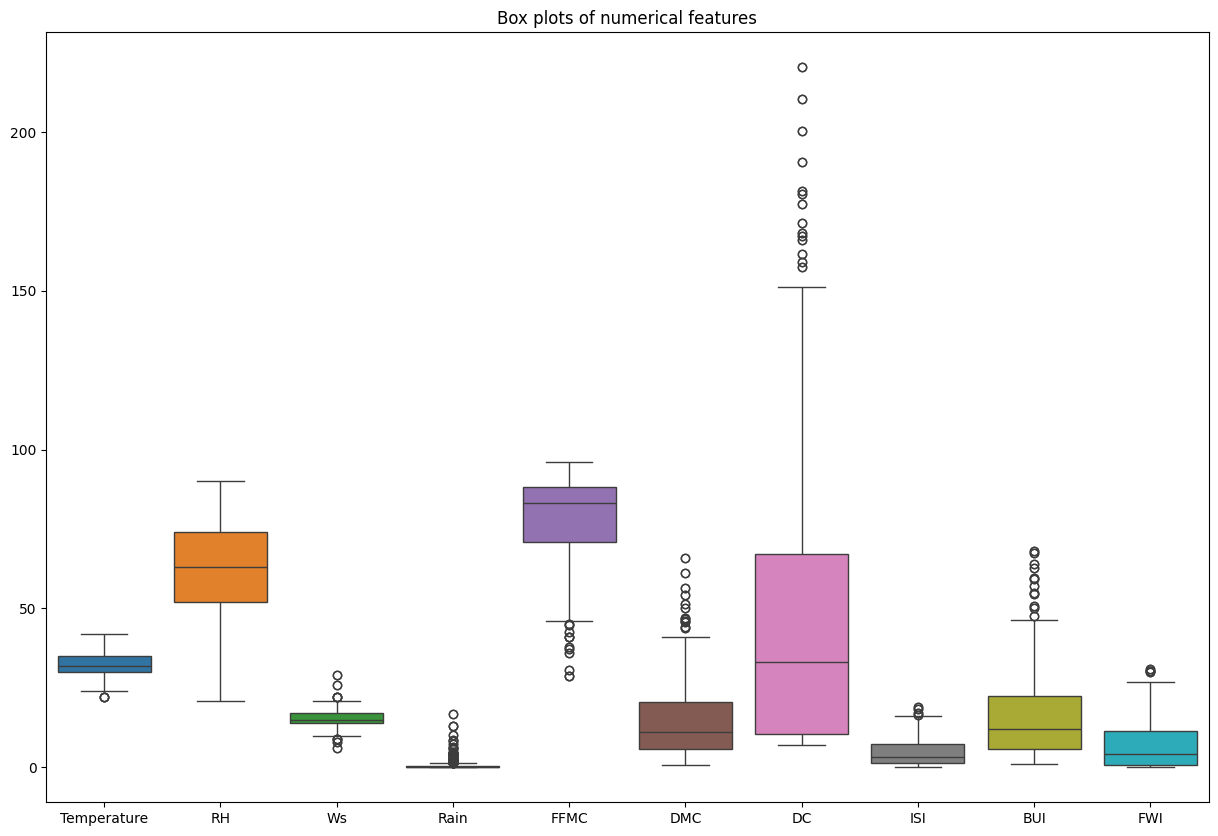

In [13]:
# Check for outliers using box plots
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(['day', 'month', 'year', 'Classes'], axis=1))
plt.title('Box plots of numerical features')
plt.show()

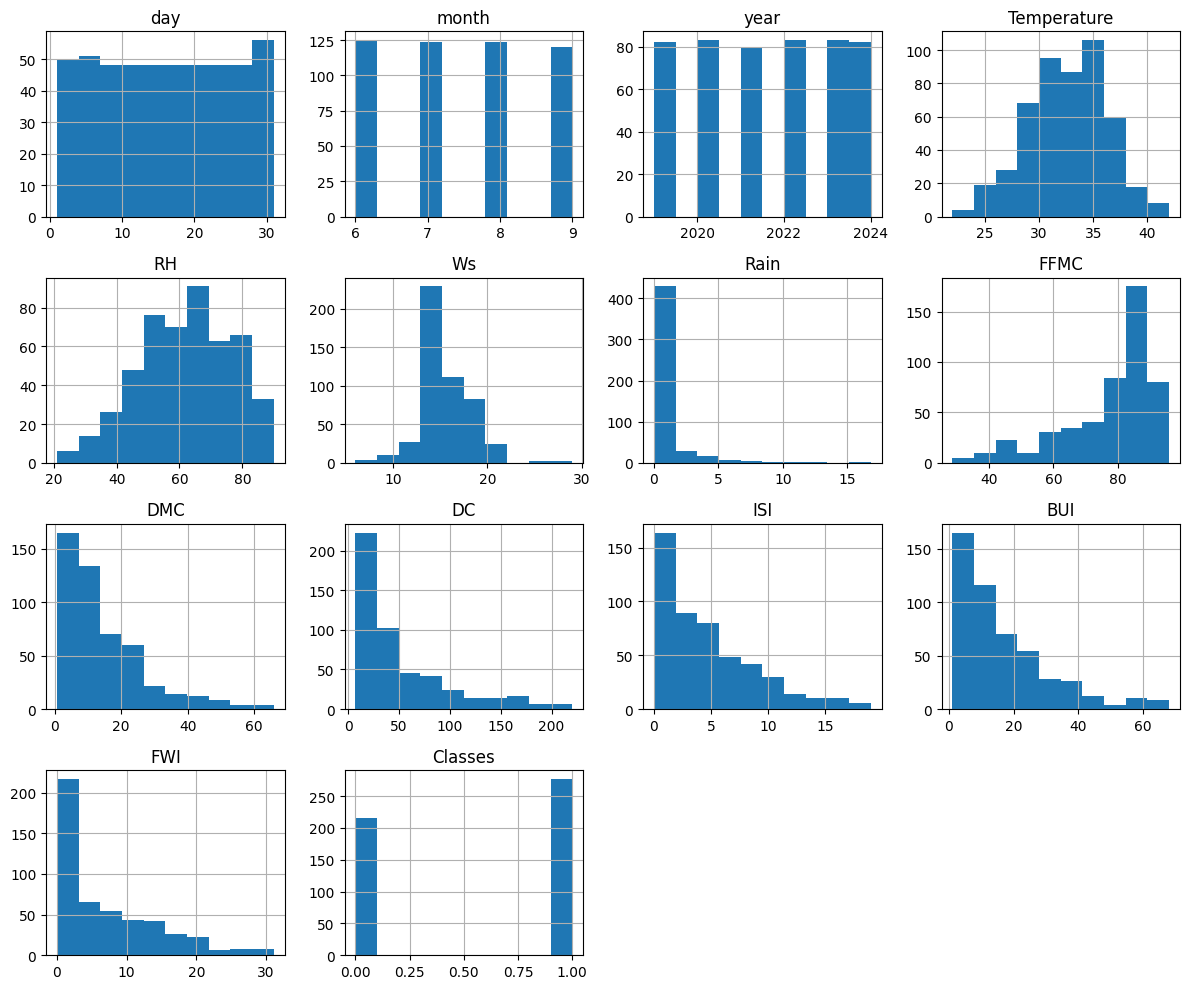

In [14]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

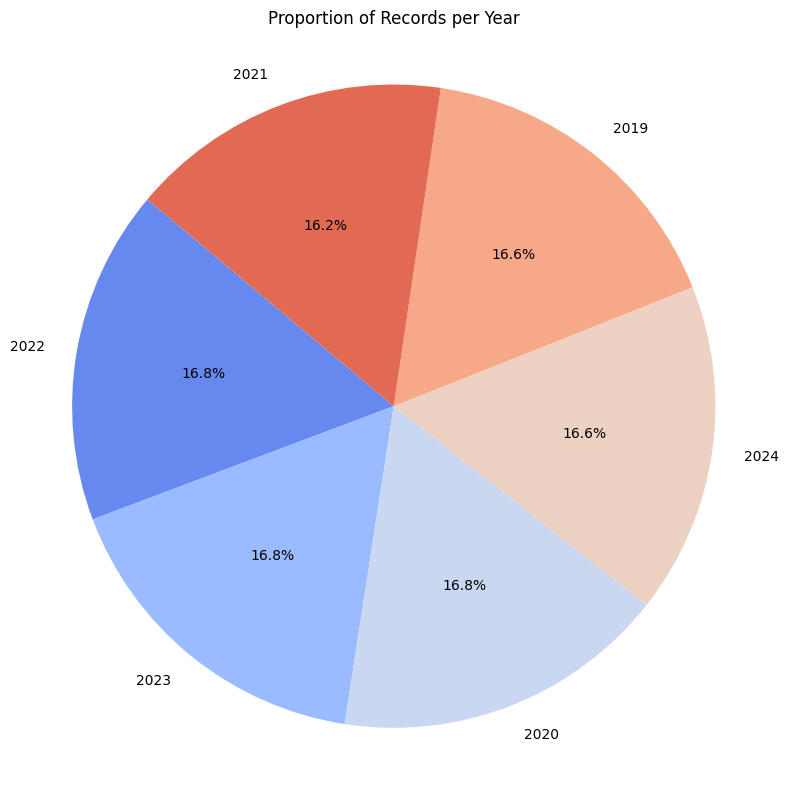

In [15]:
# Count the number of records for each year
year_counts = df['year'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8)) # Adjust figure size as needed
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(year_counts)))
plt.title("Proportion of Records per Year")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

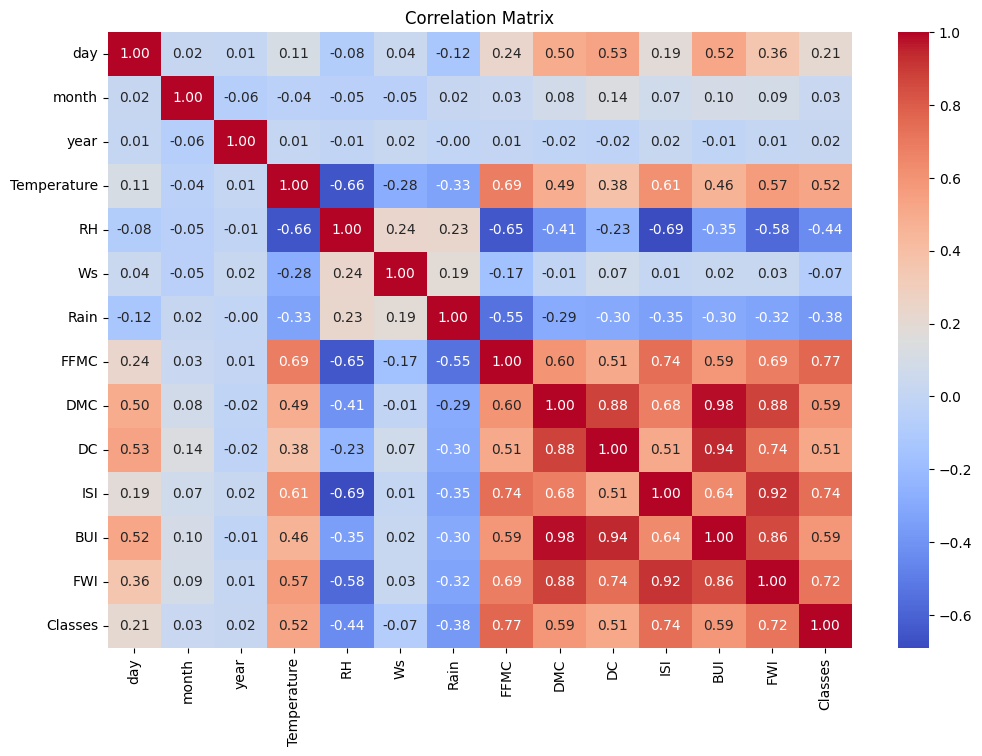

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


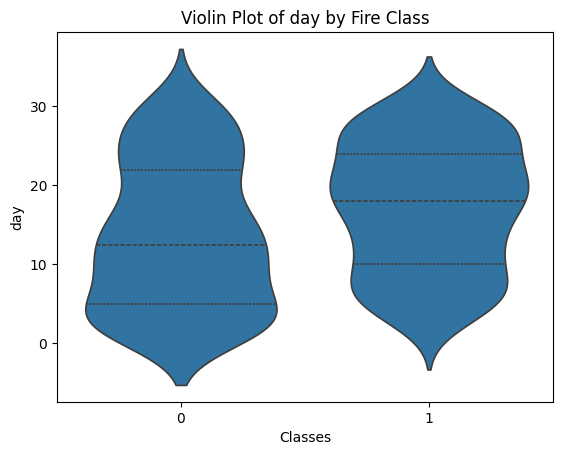

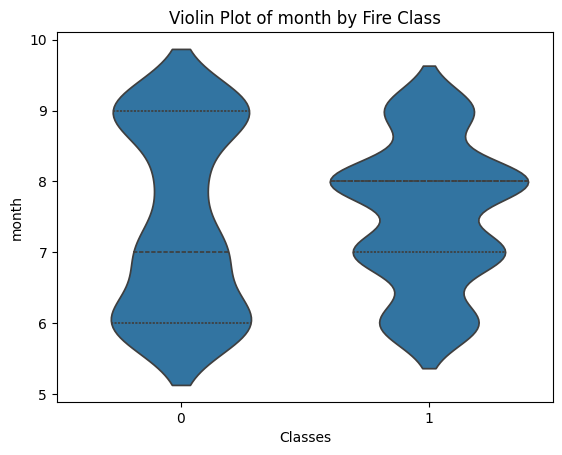

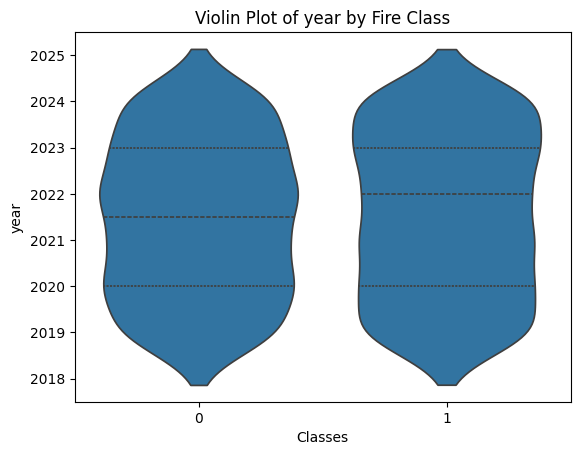

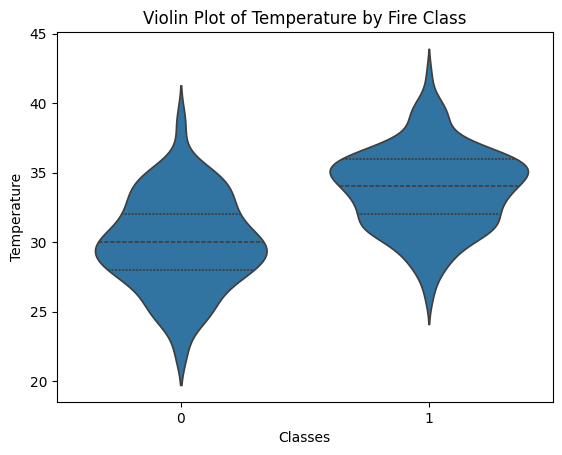

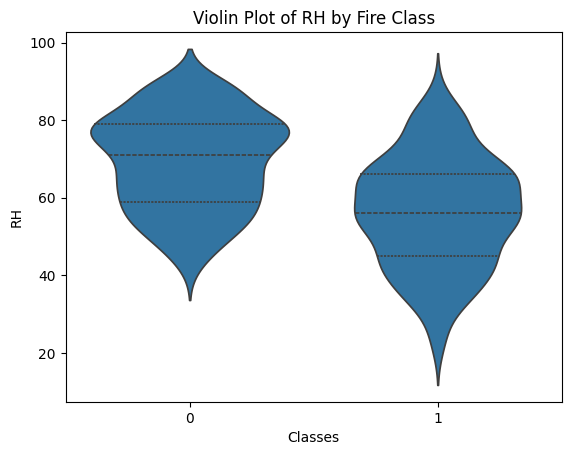

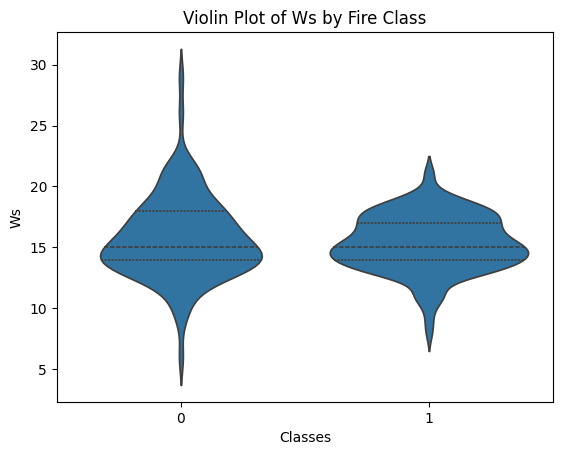

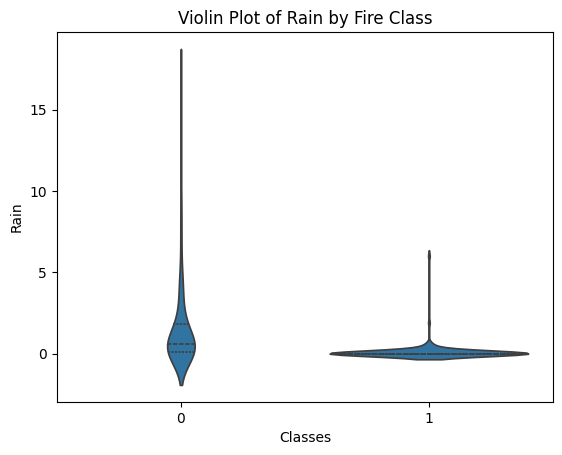

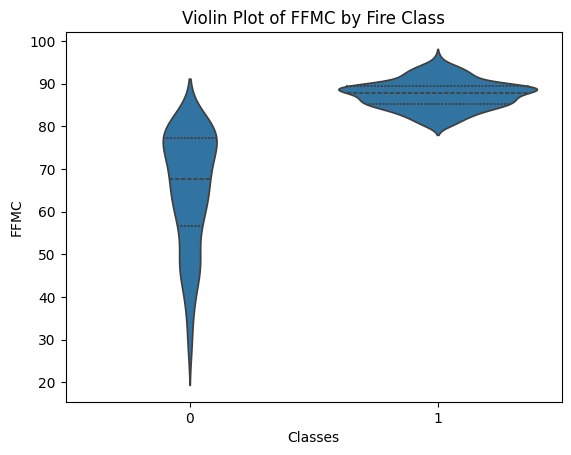

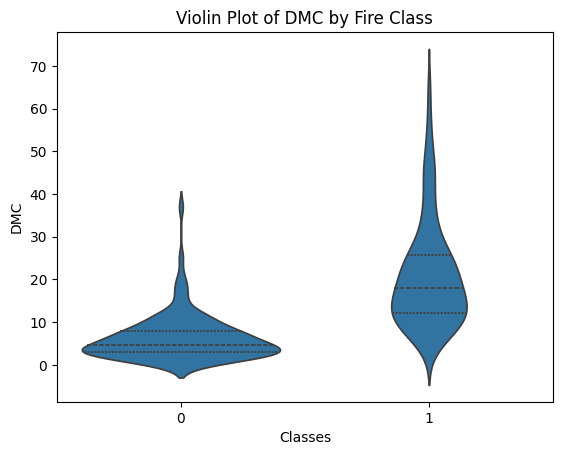

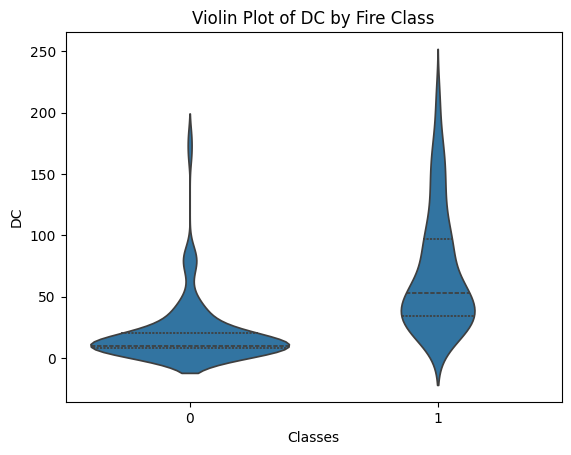

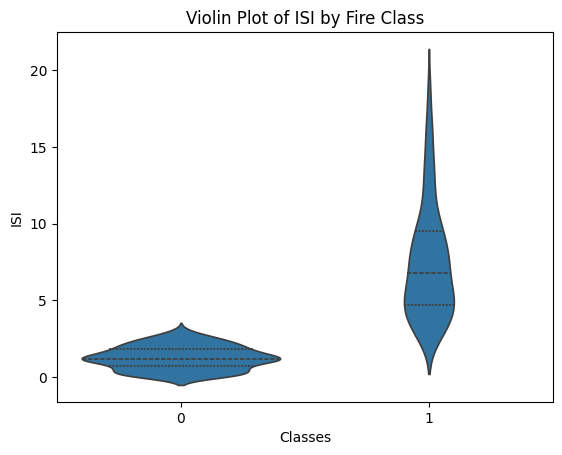

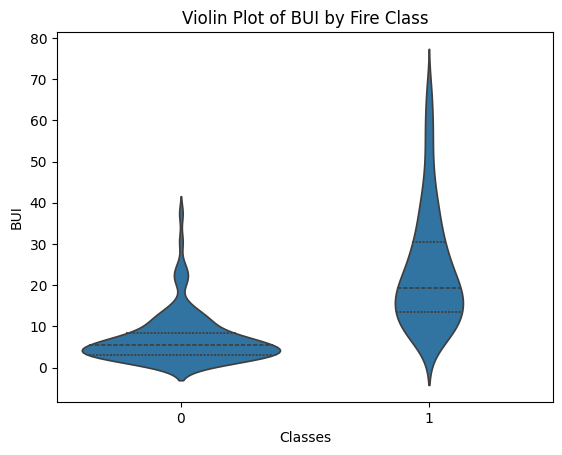

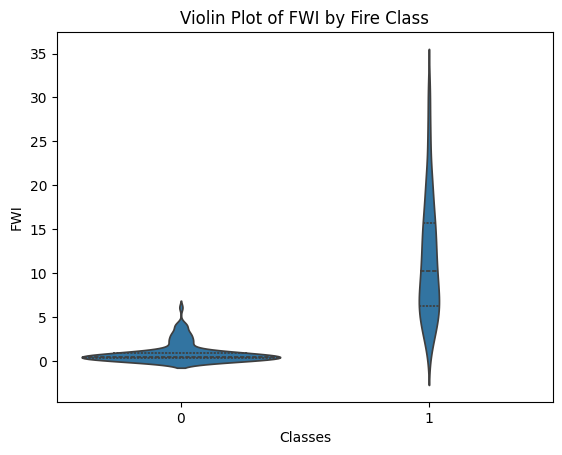

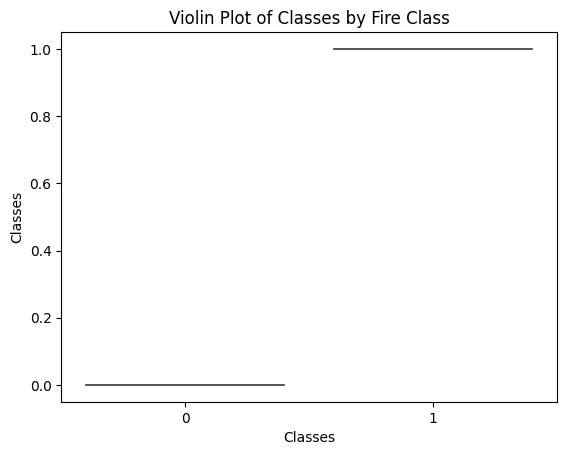

In [17]:
for feature in df:
    sns.violinplot(data=df, x='Classes', y=feature, inner='quartile')
    plt.title(f'Violin Plot of {feature} by Fire Class')
    plt.show()

In [18]:
df.drop(['day','month','year'], axis=1, inplace=True)
X = df.drop('FWI',axis=1)
y= df['FWI']

In [19]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0
...,...,...,...,...,...,...,...,...,...,...
488,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
489,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
490,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
491,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0


In [20]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
488,0.4
489,0.1
490,0.0
491,0.5


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((369, 10), (124, 10))

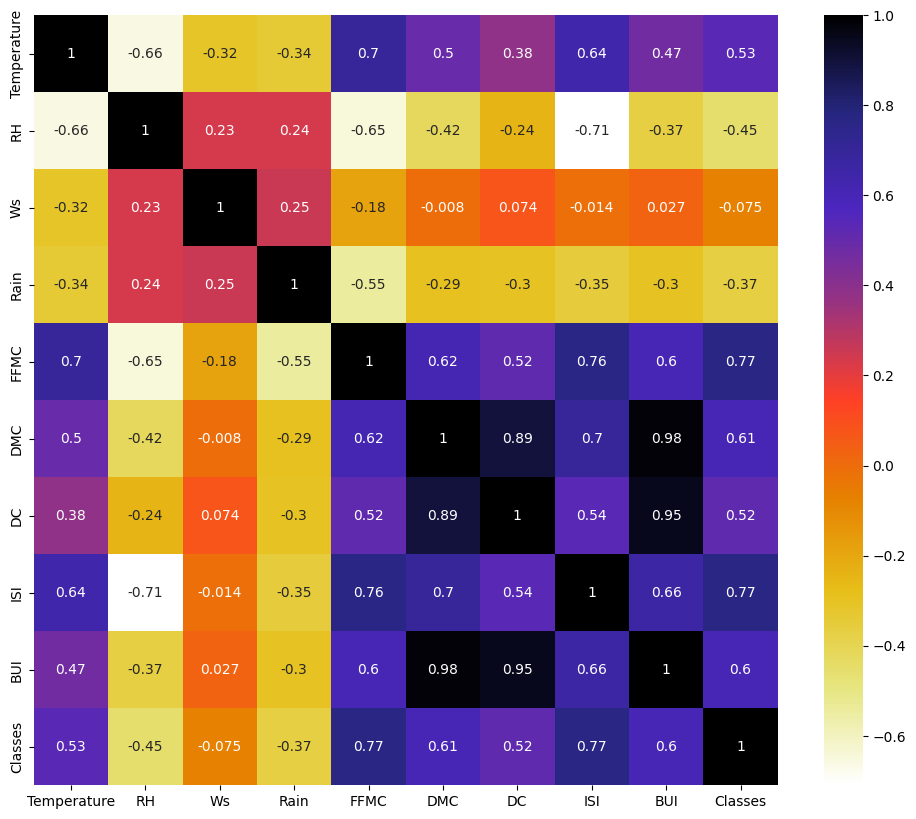

In [22]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [23]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute correlation values
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(X_train, 0.75)
corr_features

{'BUI', 'Classes', 'DC', 'ISI'}

In [25]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((369, 6), (124, 6))

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mse = mean_squared_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MSE value: {:.4f}".format(mse))

Linear Regression
R2 Score value: 0.7975
MSE value: 10.1483


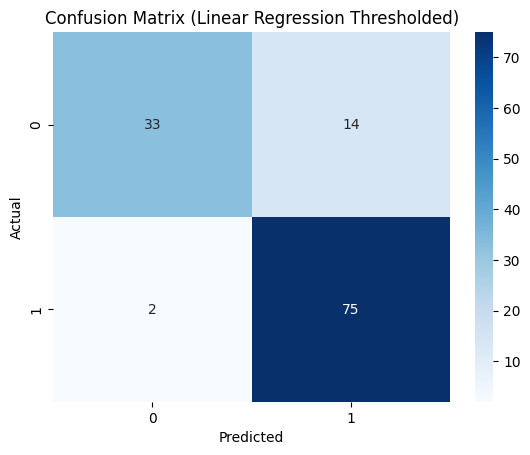

In [28]:
threshold = y_train.median()

lreg_class_pred = (lreg_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

cm = confusion_matrix(y_test_class, lreg_class_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Linear Regression Thresholded)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
mse = mean_squared_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)

print("K_Neighbours Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MSE value: {:.4f}".format(mse))

K_Neighbours Regressor
R2 Score value: 0.8915
MSE value: 5.4396


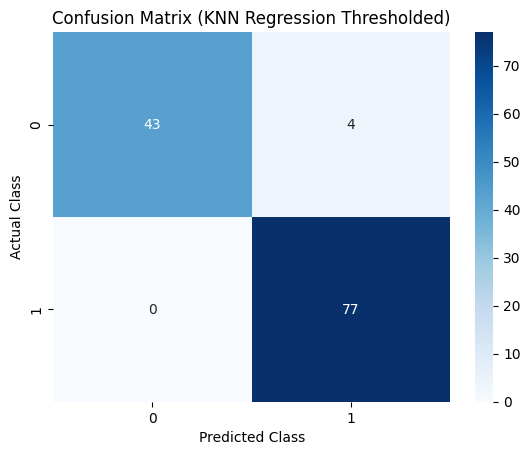

In [30]:
threshold = y_train.median()
y_test_class = (y_test > threshold).astype(int)
knn_class_pred = (knn_pred > threshold).astype(int)
cm = confusion_matrix(y_test_class, knn_class_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (KNN Regression Thresholded)')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [31]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MSE value: {:.4f}".format(mse))

Random Forest Regressor
R2 Score value: 0.9845
MSE value: 0.7783


In [32]:
param_grid = {
    'n_estimators': [5, 10],
    'max_depth': [5, 7],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=4,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_
rf_pred = best_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print("Tuned Random Forest Regressor")
print("Best Parameters:", grid_search.best_params_)
print("R² Score: {:.4f}".format(r2))
print("MSE: {:.4f}".format(mse))

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Tuned Random Forest Regressor
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
R² Score: 0.9621
MSE: 1.8993


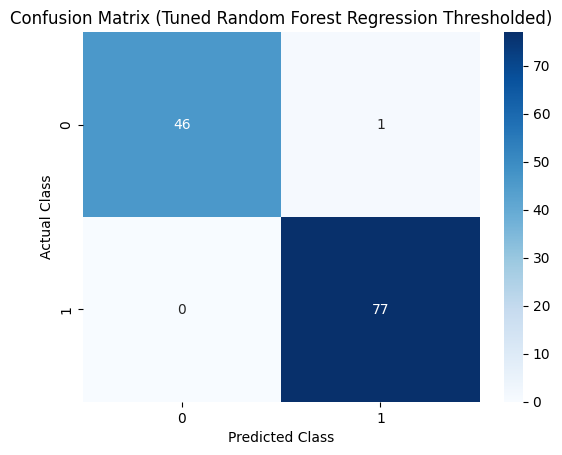

In [33]:
threshold = y_train.median()

rf_class_pred = (rf_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

cm = confusion_matrix(y_test_class, rf_class_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Tuned Random Forest Regression Thresholded)')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [34]:
X = df.drop('Classes',axis=1)
y= df['Classes']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=36)
X_train.shape, X_test.shape

((345, 10), (148, 10))

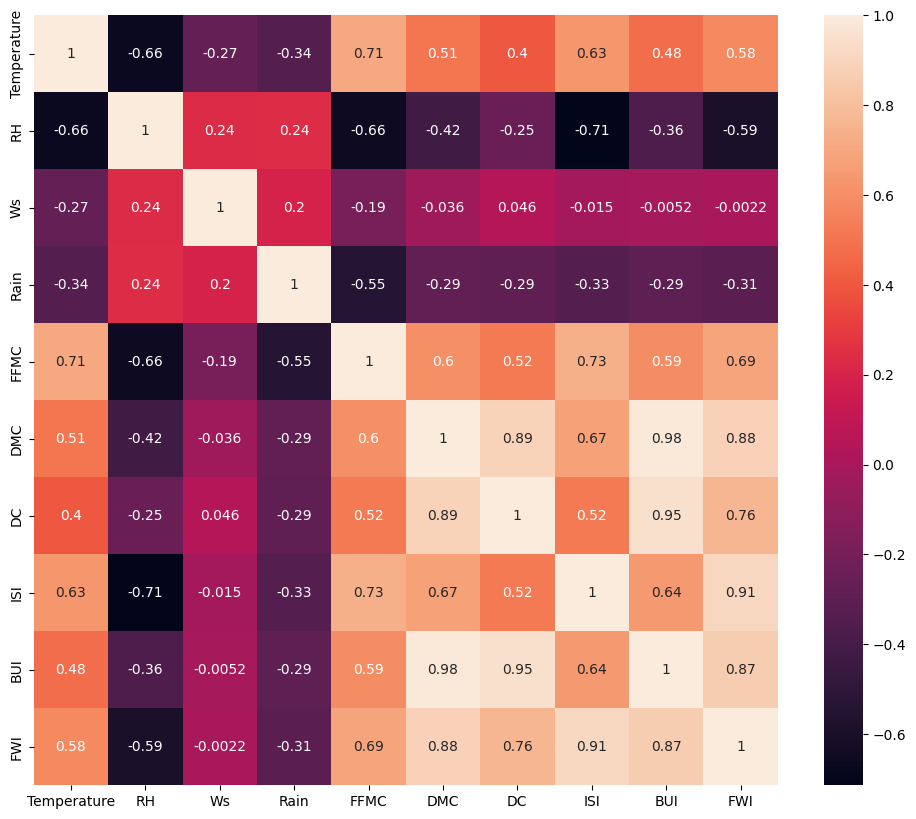

In [36]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [37]:
corr_features = correlation(X_train, 0.75)
corr_features
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((345, 7), (148, 7))

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train_scaled,y_train)
loreg_pred = loreg.predict(X_test_scaled)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)
print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.9527
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        62
           1       0.95      0.97      0.96        86

    accuracy                           0.95       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.95      0.95      0.95       148



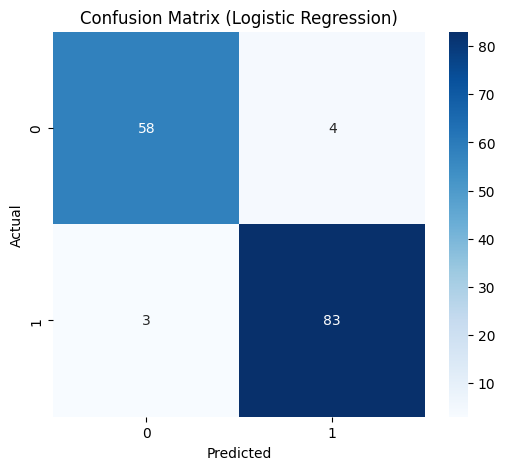

In [40]:
cm = confusion_matrix(y_test, loreg_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        86

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



In [42]:
# Add pruning to avoid overfitting
dtc = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=0
)

dtc.fit(X_train_scaled, y_train)

y_pred = dtc.predict(X_test_scaled)
print("Decision Tree with Pruning")
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy Score: {:.4f}".format(accuracy))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree with Pruning
Overall Accuracy Score: 0.9595

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        62
           1       0.93      1.00      0.97        86

    accuracy                           0.96       148
   macro avg       0.97      0.95      0.96       148
weighted avg       0.96      0.96      0.96       148



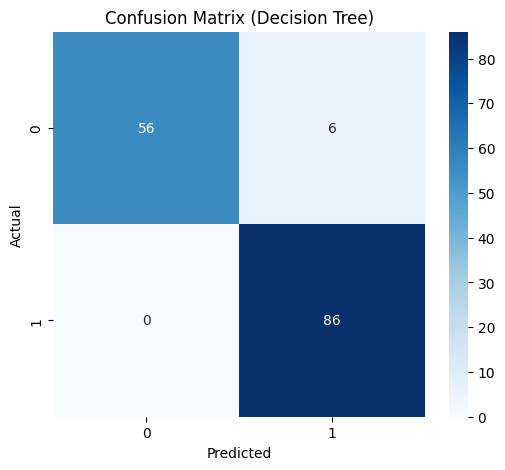

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
import joblib

# Save the best model
joblib.dump(best_rf, 'fire_model.pkl')

['fire_model.pkl']

In [77]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor # Ensure RandomForestRegressor is imported for type hinting and clarity

st.set_page_config(page_title="Forest Fire Prediction", page_icon="🔥", layout="wide")

st.title("🔥 Forest fire Risk Prediction")
st.write("Enter current conditions to estimate the predicted **Fire Weather Index (FWI)**.")

# Load model and dataset
@st.cache_resource
def load_model_and_data():
    model: RandomForestRegressor = joblib.load("fire_model.pkl")
    df = pd.read_csv("Forest_Fires_Data.csv")

    X_full = df[['FFMC', 'DMC', 'DC', 'ISI', 'Temperature', 'RH', 'Ws', 'Rain']]

    correlated_features_to_drop = ['DC','ISI']

    model_features = [col for col in X_full.columns if col not in correlated_features_to_drop]

    model_scaler = StandardScaler()

    X_model_features = X_full[model_features]

    model_scaler.fit(X_model_features)


    return model, model_scaler, X_full, model_features

model, model_scaler, X_full_data, model_features = load_model_and_data()

st.sidebar.header("🌿 Environmental Inputs")

temp = st.sidebar.slider("Temperature (°C)", 0.0, float(X_full_data['Temperature'].max()), 0.0)
RH = st.sidebar.slider("Relative Humidity (%)", 0, int(X_full_data['RH'].max()), 0)
wind = st.sidebar.slider("Wind Speed (km/h)", 0.0, float(X_full_data['Ws'].max()), 0.0)
rain = st.sidebar.slider("Rainfall (mm)", 0.0, float(X_full_data['Rain'].max()), 0.0)
ISI = st.sidebar.slider("Initial Spread Index", 0.0, float(X_full_data['ISI'].max()), 0.0)
FFMC = st.sidebar.slider("Fine Fuel Moisture Code (FFMC)", 0.0, float(X_full_data['FFMC'].max()), 0.0)
DMC = st.sidebar.slider("Duff Moisture Code (DMC)", 0.0, float(X_full_data['DMC'].max()), 0.0)
DC = st.sidebar.slider("Drought Code (DC)", 0.0, float(X_full_data['DC'].max()), 0.0)


input_df_full = pd.DataFrame({
    'FFMC': [FFMC],
    'DMC': [DMC],
    'DC': [DC],
    'ISI': [ISI],
    'Temperature': [temp],
    'RH': [RH],
    'Ws': [wind],
    'Rain': [rain]
})


input_df_model_features = input_df_full[model_features]


scaled_input = model_scaler.transform(input_df_model_features)

prediction = model.predict(scaled_input)[0]

col1, col2 = st.columns([2, 1])

with col1:
    st.subheader("📊 Predicted Fire Weather Index (FWI)")
    st.markdown(f"""
        <div style="background-color:white;padding:20px;border-radius:10px;box-shadow:0 2px 8px rgba(0,0,0,0.1);">
            <h2 style="color:#e25822;">{prediction:.2f}</h2>
            <p>FWI reflects the potential intensity of a forest fire.</p>
        </div>
    """, unsafe_allow_html=True)

with col2:
    st.subheader("📋 Input Summary")
    st.dataframe(input_df_full.style.format(precision=2), use_container_width=True)


Overwriting app.py


In [79]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

104.196.169.148
⠙your url is: https://long-animals-leave.loca.lt
